# Análise dos Microdados da Vacina do Covid-19

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#para pegar a os microdados das vacinas aplicadas 
microdadosVacina = pd.read_csv("vacinados.csv", sep=";", encoding='utf-8')
microdadosVacina

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU
...,...,...,...,...,...,...,...,...,...
3407293,***.619.454-**,NECIRA FERREIRA DE SANTANA,FEMININO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407294,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,2.0,2021-03-11,DRIVE THRU GERALDÃO
3407295,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407296,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-17,DRIVE THRU GERALDÃO


In [8]:
microdadosVacina = microdadosVacina.drop(columns=['cpf','nome','grupo','vacina','lote','data_vacinacao','sexo',])
microdadosVacina.head()

,dose,local_vacinacao
0,2.0,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,1.0,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,2.0,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,1.0,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,3.0,CENTRO DE VACINAÇÃO UNINASSAU


In [9]:
#tirando os valores
micro = microdadosVacina.dropna()

In [10]:
#separando para trabalhar apenas com as colunas de local de vacinaçao e a dose aplicada
colunasSelecionadas_LocaisVacinas = ['local_vacinacao']
colunasSelecionadas_DosesVacinas = ['dose']
microdadosVacina_Locais = microdadosVacina.filter(items = colunasSelecionadas_LocaisVacinas)
microdadosVacina_Doses = microdadosVacina.filter(items = colunasSelecionadas_DosesVacinas)

In [25]:
#fazendo a contagem para ver quantos locais de vacinaçao tem e quantas doses foram aplicadas em cada local
microdadosVacina_Locais.value_counts().head()

local_vacinacao                            
DRIVE THRU PARQUE DA MACAXEIRA                 225295
CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA    220034
DRIVE THRU GERALDÃO                            215437
DRIVE THRU - DNOCS                             197749
DRIVE THRU DA UFPE                             177421
dtype: int64

In [12]:
#fazendo a contagem da distribuiçao de quantas vacinas foram aplicadas de cada dose
microdadosVacina_Doses.value_counts()

dose
1.0     1519688
2.0     1312330
3.0      574350
4.0         929
dtype: int64

array([[<AxesSubplot: title={'center': 'dose'}>]], dtype=object)

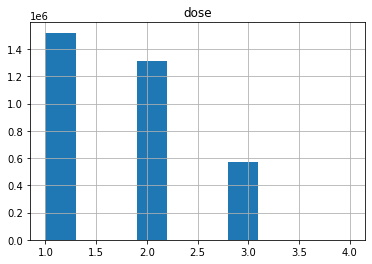

In [13]:
#grafico de histograma da quantidade de doses
microdadosVacina_Doses.hist()

In [14]:
#descobrindo a porcentagem de quantas pessoas tomaram cada dose
distInDoses = microdadosVacina_Doses.value_counts()
percentInDoses = [100*x/distInDoses.sum() for x in distInDoses]
print(percentInDoses)

[44.60098429928474, 38.515280587515555, 16.856470099319196, 0.027265013880504105]


In [23]:
outros = (microdadosVacina['local_vacinacao'] != 'DRIVE THRU PARQUE DA MACAXEIRA')&(microdadosVacina['local_vacinacao'] != 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA')&(microdadosVacina['local_vacinacao'] != 'DRIVE THRU - DNOCS')&(microdadosVacina['local_vacinacao'] != 'DRIVE THRU GERALDÃO')&(microdadosVacina['local_vacinacao'] != 'DRIVE THRU DA UFPE')
qntd_outros_total = outros.sum()
print(qntd_outros_total)

2371362


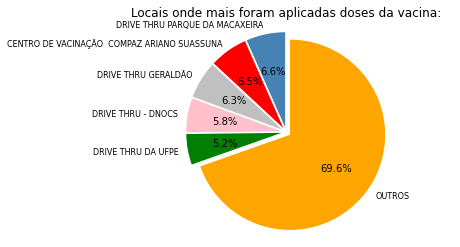

Quantidade de vacinas do local com maior numero de vacinas: 225295
Quantidade de vacinas do local com segundo maior numero de vacinas: 220034
Quantidade de vacinas do local com terceiro maior numero de vacinas: 215437
Quantidade de vacinas do local com quarto maior numero de vacinas: 197749
Quantidade de vacinas do local com quinto maior numero de vacinas: 177421
Quantidade de vacinas dos outros locais: 2371362


In [29]:
local1 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
qtd_1_local = local1.count()[0]

local2 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA']
qtd_2_local = local2.count()[0]

local3 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
qtd_3_local = local3.count()[0]

local4 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU - DNOCS']
qtd_4_local = local4.count()[0]

local5 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU DA UFPE']
qtd_5_local = local5.count()[0]

labels = ['DRIVE THRU PARQUE DA MACAXEIRA', 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA', 'DRIVE THRU GERALDÃO', 'DRIVE THRU - DNOCS', 'DRIVE THRU DA UFPE', 'OUTROS']
values = [qtd_1_local, qtd_2_local, qtd_3_local, qtd_4_local, qtd_5_local, qntd_outros_total]

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 8
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'red', 'silver', 'pink', 'green', 'orange'], explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Locais onde mais foram aplicadas doses da vacina:')
ax1.axis('equal')
plt.show()

print(f'Quantidade de vacinas do local com maior numero de vacinas: {qtd_1_local}')
print(f'Quantidade de vacinas do local com segundo maior numero de vacinas: {qtd_2_local}')
print(f'Quantidade de vacinas do local com terceiro maior numero de vacinas: {qtd_3_local}')
print(f'Quantidade de vacinas do local com quarto maior numero de vacinas: {qtd_4_local}')
print(f'Quantidade de vacinas do local com quinto maior numero de vacinas: {qtd_5_local}')
print(f'Quantidade de vacinas dos outros locais: {qntd_outros_total}')

#esse gráfico demonstra que apesar dos pontos de maior estrutura pra vacinar, a vacinação ocorreu de modo mt disperso pela cidade: